<h1 style="font-size=20pt;color:orange">Minicurso Analisis de Datos usando Python

## Parte 5 - Introducción al Aprendizaje Automático usando Python

### Regression lineal usando datos simulados

In [193]:
# Simula datos
import math
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from statistics import stdev

scaler = StandardScaler()

n=500
p=20
rho=0.6
X=np.random.normal(0,1,(n,p))  # matriz de predictores
X = scaler.fit_transform(X)
b=np.random.normal(0,1,p)  # coeficicientes
eta=X.dot(b)
eta=(eta-np.mean(eta))/stdev(eta)   # Valor verdadero

error=np.random.normal(0,1,n)  # Error aleatorio
error=(error-np.mean(error))/stdev(error)

y=rho*eta+math.sqrt(1-rho**2)*error  # respuesta
print("Correlation(observed,valor_verdadero)="+str(pearsonr(y,eta)[0]))
pd.DataFrame(X)

Correlation(observed,valor_verdadero)=0.5764011230296602


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.752804,-1.614615,0.451459,-1.967988,0.460305,1.908229,0.650162,-1.882578,0.278178,0.169956,-0.625712,1.553974,0.534432,-0.874968,2.295423,-1.261260,0.244518,-1.907899,0.067570,1.945200
1,1.523440,0.097667,0.865903,-0.251423,1.933792,-1.548233,0.346180,0.355815,-1.102661,0.187790,0.074450,-0.362033,-0.337231,0.491690,-0.580868,0.333232,-0.103800,1.214169,1.416384,0.160053
2,-0.019634,0.654495,-0.007037,0.402763,0.975121,0.048709,-0.607334,-0.725982,-0.041223,0.910018,2.607045,0.654345,-1.102830,0.130324,0.889185,-0.588242,0.018376,1.677709,-0.480601,-1.175699
3,-1.771875,1.564579,-0.139023,-0.034798,1.632415,2.656851,-0.922987,-0.884278,0.176451,0.243906,-1.002368,2.947037,1.341925,-1.342370,0.668255,1.695099,0.073255,-1.325413,-1.477979,-1.888165
4,1.419602,1.476286,1.165874,-0.421364,1.119413,-0.213303,0.850353,0.064360,0.443895,0.045908,-0.203814,0.450703,-1.123006,-0.188176,-1.043635,0.764449,-1.473225,0.197838,-0.417557,-0.160073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.407877,-1.497685,-0.914460,-0.619965,0.615814,-2.678418,0.106719,0.702755,0.071217,-0.266030,0.993533,1.813524,0.380152,-2.963381,0.359490,0.200417,0.169363,1.099166,1.175805,-0.133973
496,0.417818,0.415213,-1.617587,2.037075,-0.020988,-0.603668,-0.163322,0.024957,-0.391280,-0.082975,-0.783288,-2.064233,0.127734,1.378819,0.195396,0.844295,-0.401912,0.641276,-0.434476,0.069108
497,1.361024,-0.203725,2.203335,-0.420249,-0.193153,0.911776,0.387059,1.479266,-1.105530,1.015134,-0.760870,0.768416,-1.075302,-0.363555,1.324033,-0.980090,-0.274164,-0.125639,-0.853653,0.457586
498,-0.439726,0.977701,0.497791,-1.899823,-0.965938,1.229698,-1.382588,1.621306,0.845424,0.262221,0.676008,0.203246,-0.255246,-1.910795,-0.346093,-0.019923,1.326856,-2.036808,0.285885,0.403587


Correlation(observed,predicted)=0.5983258137837659
[ 0.06125356  0.01698641 -0.23471714  0.11234733  0.17362829  0.10915745
 -0.00470402  0.1132238   0.10939172 -0.05400577  0.04772255  0.20599565
 -0.2429633  -0.00796092  0.20062717  0.08011974 -0.23377536  0.00601946
 -0.14567029 -0.03595911]


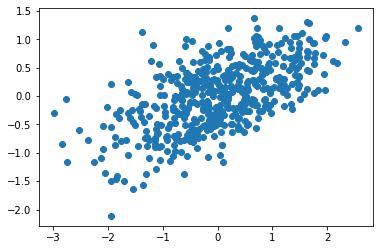

In [194]:
import matplotlib.pyplot as plt
import random

# Regression lineal: beta= (X'X)^-1 X'y

# Define funcion que retorne coeficicientes de regresion 
def calcula_beta(X, y):
    XtX=np.dot(X.T,X)
    XtXinv = np.linalg.inv(XtX) 
    Xty=np.dot(X.T,y)
    return np.dot(XtXinv,Xty)

beta=calcula_beta(X,y)
yHat=np.dot(X,beta)
plt.scatter(y,yHat)
print("Correlation(observed,predicted)="+str(pearsonr(y,yHat)[0]))
print(beta)

0.2853005852408035


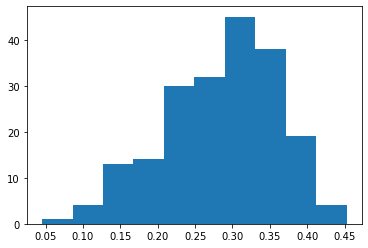

In [198]:
# Hacer muchas hold-out cross validations
nRep=200
nTST=math.ceil(n*0.2)
accuracy=np.zeros(nRep)
for k in range(nRep):
    indexTST=random.sample(range(n), nTST) # Testing set
    indexTRN=[i for i in range(n) if i not in indexTST]  # Training set
    X_tst=X[indexTST,:]
    y_tst=y[indexTST]
    X_trn=X[indexTRN,:]
    y_trn=y[indexTRN]
    beta0=calcula_beta(X_trn,y_trn)
    yHat0=np.dot(X_tst,beta0)
    SStot=sum((y_tst-np.mean(y_tst))**2)
    SSres=sum((y_tst-yHat0)**2)
    accuracy[k]=1-SSres/SStot

accuracy 
print(sum(accuracy)/len(accuracy))

plt.hist(accuracy)
plt.show()

### Entrenando y evaluando el modelo usando librerias establecidas

In [199]:
# Cargar librerias
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [200]:
import sklearn
sklearn.__version__

'0.24.1'

[0.17683032 0.44506827 0.19328798 0.18136672 0.30131017 0.25973154
 0.2854606  0.26407944 0.20796969 0.32296272 0.32019478 0.30736663
 0.29169986 0.33651891 0.18524687 0.28295572 0.27563462 0.39947504
 0.32984323 0.25071809 0.28691449 0.31069895 0.2952142  0.26729196
 0.34738399 0.20117568 0.27234979 0.34744054 0.2204558  0.30303702
 0.33974699 0.35368822 0.29449036 0.2646085  0.33878082 0.36206762
 0.23488673 0.1702838  0.14805557 0.33621104 0.36160239 0.33502218
 0.27734395 0.35809496 0.31343577 0.24097846 0.2062249  0.40653348
 0.35269481 0.40022741 0.20866587 0.14545664 0.25359669 0.24534836
 0.40280892 0.29642053 0.31213641 0.28325187 0.23371647 0.12945965
 0.30362309 0.36789619 0.35548055 0.35911385 0.33438886 0.16318892
 0.15398187 0.27290082 0.40051343 0.27557912 0.23271631 0.37265758
 0.28885227 0.23719081 0.15714105 0.35423938 0.34417219 0.14932084
 0.22694323 0.35887591 0.13847661 0.29716833 0.35421429 0.27692483
 0.39656456 0.21772477 0.30457935 0.26842156 0.3830989  0.3031

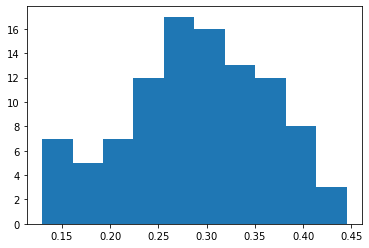

In [202]:
# Cargar librerias
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

nRep = 100
accuracy = np.zeros(nRep)
for i in range(nRep):
    #print("Repetition "+str(i+1))
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2)
    
    # Entrenamiento
    model = LinearRegression()
    model.fit(X_trn, y_trn)    
    
    # Hacer prediccion a partir del model entrenado
    y_pred = model.predict(X_tst)
    
    # Validacion del modelo usando datos observados
    accuracy[i] = model.score(X_tst,y_tst)

print(accuracy)
print("average accuracy="+str(np.mean(accuracy)))

plt.hist(accuracy)
plt.show()
    